<a href="https://colab.research.google.com/github/HallelWeinberg/Image-Processing/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Geometric Operations**
In this homework we will be writing python functions which perform Geometric operations on an image.

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
np.set_printoptions(precision=7)

# size of the image
m,n = 921, 750

# frame points of the blank wormhole image
src_points = np.float32([[0, 0],
                            [int(n / 3), 0],
                            [int(2 * n /3), 0],
                            [n, 0],
                            [n, m],
                            [int(2 * n / 3), m],
                            [int(n / 3), m],
                            [0, m]])

# blank wormhole frame points
dst_points = np.float32([[96, 282],
                       [220, 276],
                       [344, 276],
                       [468, 282],
                       [474, 710],
                       [350, 744],
                       [227, 742],
                       [103, 714]]
                      )

In [7]:
def find_transform(pointset1, pointset2):
    X = np.zeros((2 * pointset1.shape[0], 8))
    new_X = np.zeros((2 * pointset2.shape[0], 1))

    for i in range(pointset1.shape[0]):
        X[2 * i, 0] = pointset1[i, 0]
        X[2 * i, 1] = pointset1[i, 1]
        X[2 * i, 4] = 1
        X[2 * i, 6] = -pointset1[i, 0] * pointset2[i, 0]
        X[2 * i, 7] = -pointset1[i, 1] * pointset2[i, 0]
        X[2 * i + 1, 2] = pointset1[i, 0]
        X[2 * i + 1, 3] = pointset1[i, 1]
        X[2 * i + 1, 5] = 1
        X[2 * i + 1, 6] = -pointset1[i, 0] * pointset2[i, 1]
        X[2 * i + 1, 7] = -pointset1[i, 1] * pointset2[i, 1]

    for i in range(pointset1.shape[0]):
        new_X[2 * i] = pointset2[i, 0]
        new_X[2 * i + 1] = pointset2[i, 1]

    temp_T = np.matmul(np.linalg.pinv(X), new_X)
    T = np.array([[temp_T[0, 0], temp_T[1, 0], temp_T[4, 0]], [temp_T[2, 0], temp_T[3, 0], temp_T[5, 0]], [temp_T[6, 0], temp_T[7, 0], 1]])
    return T


def trasnform_image(image, T):
    Tinv = np.linalg.pinv(T)
    new_image = np.zeros((image.shape[0], image.shape[1]), dtype = np.float32)
    point = np.ones((3, 1), dtype = np.float32)
    for new_i in range(image.shape[0]):
        for new_j in range(image.shape[1]):
            point[1][0] = new_i
            point[0][0] = new_j

            original_point = np.matmul(Tinv, point)
            i = round(original_point[1][0] / original_point[2][0])
            j = round(original_point[0][0] / original_point[2][0])

            if 0 <= i <= image.shape[0] - 1 and 0 <= j <= image.shape[1] - 1:
                new_image[new_i][new_j] = image[i][j]
    return new_image


def create_wormhole(im, T, iter=5):
    new_image = im.copy()
    for i in range(iter):
        im = trasnform_image(im, T)
        new_image = new_image + im
    new_image = np.clip(new_image, 0, 255)
    return new_image

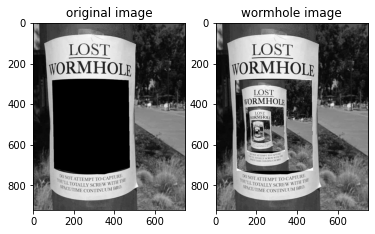

In [8]:
    wormhole = cv2.imread(r'blank_wormhole.jpg')
    im = cv2.cvtColor(wormhole, cv2.COLOR_BGR2GRAY)

    T = find_transform(src_points, dst_points)

    new_image = create_wormhole(im, T, iter=5)

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(im, cmap='gray')
    plt.title('original image')
    plt.subplot(1, 2, 2)
    plt.imshow(new_image, cmap='gray')
    plt.title('wormhole image')

    plt.show()